<a href="https://colab.research.google.com/github/FERNANDOBUCHELLY/TAM2025-2/blob/main/detector_de_rostros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Universidad Nacional de Colombia*

Tarea #1
reconocimiento facial

Luis Fernando Castro BUchelly     
c.c. 1122786100

Sube las 3 imágenes (dos de la misma persona y una de otra)


Saving 79d25f7ce8bf28d49c95085a1c0bfd72.jpg to 79d25f7ce8bf28d49c95085a1c0bfd72.jpg
Saving 1787770464_0340_0340.jpg to 1787770464_0340_0340.jpg
Saving adam-sandler_hyvv.jpg to adam-sandler_hyvv.jpg
Archivos cargados: ['79d25f7ce8bf28d49c95085a1c0bfd72.jpg', '1787770464_0340_0340.jpg', 'adam-sandler_hyvv.jpg']
 Embedding generado para 79d25f7ce8bf28d49c95085a1c0bfd72.jpg, dimensiones: 128
 Embedding generado para 1787770464_0340_0340.jpg, dimensiones: 128
 Embedding generado para adam-sandler_hyvv.jpg, dimensiones: 128

 Distancias entre vectores:
Imagen 1 vs Imagen 2: 12.7280
Imagen 1 vs Imagen 3: 13.0204
Imagen 2 vs Imagen 3: 7.0811


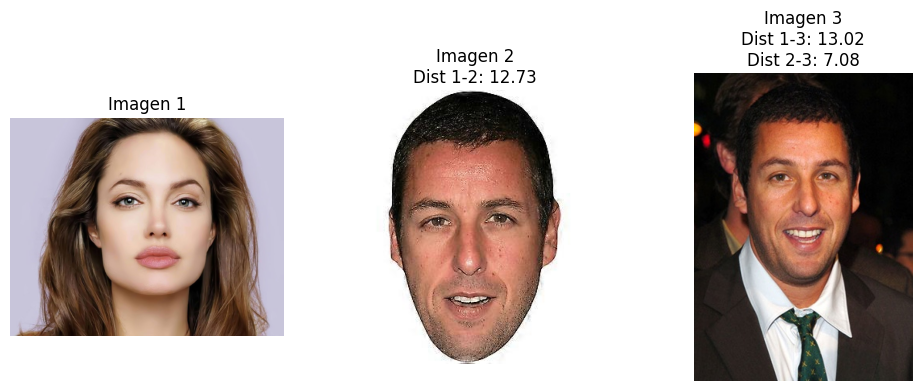

In [ ]:
# ==========================================
# Instalación de DeepFace
# ==========================================
!pip install deepface --quiet

from deepface import DeepFace
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import cv2

# ==========================================
# Subir imágenes
# ==========================================
print("Sube las 3 imágenes (dos de la misma persona y una de otra)")
uploaded = files.upload()

# Guardar nombres de archivos
image_files = list(uploaded.keys())
print("Archivos cargados:", image_files)

# ==========================================
# Convertir imágenes en vectores (embeddings)
# ==========================================
embeddings = []
imgs = []

for img_file in image_files:
    try:
        # Leer imagen (para mostrarla)
        img = cv2.imread(img_file)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(img)

        # Extraer embedding con modelo FaceNet
        embedding_obj = DeepFace.represent(img_path = img_file, model_name = "Facenet")[0]
        vector = embedding_obj["embedding"]
        embeddings.append(np.array(vector))
        print(f" Embedding generado para {img_file}, dimensiones: {len(vector)}")
    except Exception as e:
        print(f" Error con {img_file}: {e}")

# ==========================================
# Calcular distancias entre vectores
# ==========================================
if len(embeddings) == 3:
    dist_1_2 = np.linalg.norm(embeddings[0] - embeddings[1])
    dist_1_3 = np.linalg.norm(embeddings[0] - embeddings[2])
    dist_2_3 = np.linalg.norm(embeddings[1] - embeddings[2])

    print("\n Distancias entre vectores:")
    print(f"Imagen 1 vs Imagen 2: {dist_1_2:.4f}")
    print(f"Imagen 1 vs Imagen 3: {dist_1_3:.4f}")
    print(f"Imagen 2 vs Imagen 3: {dist_2_3:.4f}")

    # ==========================================
    # Mostrar imágenes con distancias
    # ==========================================
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(imgs[0])
    axs[0].axis("off")
    axs[0].set_title("Imagen 1")

    axs[1].imshow(imgs[1])
    axs[1].axis("off")
    axs[1].set_title(f"Imagen 2\nDist 1-2: {dist_1_2:.2f}")

    axs[2].imshow(imgs[2])
    axs[2].axis("off")
    axs[2].set_title(f"Imagen 3\nDist 1-3: {dist_1_3:.2f}\nDist 2-3: {dist_2_3:.2f}")

    plt.show()

else:
    print("No se generaron embeddings para las 3 imágenes.")
